# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

The first observable trend from this data is that temperature seems to largely depend on latitude. This is apparent from all the correlation graphs comparing latitude to temperature. While the northern hemisphere has an r value of -.86, the southern has a value of .41. The temperature in either case is highest closer to 0 degrees latitude. This points to the equator being the warmest part of the Earth. This can also be seen on the graph of the combined data, where the curve is highest at 0 degrees as well. The second trend is that humidity seems to increase slightly towards northern latitudes. This is based on the fact that both the northern and southern hemispheres have positive r values of .35 and .31, respectively. There are more cities with higher humidity levels in the northern hemisphere as apparent from the graph of the combined data as well. The last conclusion is that cloudiness does not seem to be affected by latitude. Both the northern hemisphere and southern hemisphere had low r values of .26 and .29, respectively, with the combined data showing scattered values for all latitudes. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
names=[]
latitude=[]
longitude=[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
print('Beginning Data Retrieval')
print('-'*30)
for x, city in enumerate(cities):
    url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=imperial'
    citystuff = requests.get(url).json()
   
    try:
         name = citystuff['name']
#         print(citystuff['name'])
     
    except:    
        print('City Not Found. Skipping...')
    else:
        print(f'Processing Record {x + 1} | {name}')
        names.append(name)
        latitude.append(citystuff['coord']['lat'])
        longitude.append(citystuff['coord']['lon'])
        max_temp.append(citystuff['main']['temp_max'])
        humidity.append(citystuff['main']['humidity'])
        cloudiness.append(citystuff['clouds']['all'])
        wind_speed.append(citystuff['wind']['speed'])
        country.append(citystuff['sys']['country'])
        date.append(citystuff['dt'])

Beginning Data Retrieval
------------------------------
Processing Record 1 | Busselton
Processing Record 2 | Albany
Processing Record 3 | Port Elizabeth
Processing Record 4 | Nampula
Processing Record 5 | Zhezkazgan
Processing Record 6 | Pevek
Processing Record 7 | Dikson
Processing Record 8 | Punta Arenas
Processing Record 9 | Port-Cartier
Processing Record 10 | Flin Flon
Processing Record 11 | Victor Harbor
Processing Record 12 | Saint George
Processing Record 13 | Bethel
Processing Record 14 | Maxixe
City Not Found. Skipping...
Processing Record 16 | Inhambane
Processing Record 17 | Malbork
Processing Record 18 | Puerto Ayora
Processing Record 19 | Tasiilaq
Processing Record 20 | Ribeira Grande
Processing Record 21 | Provideniya
Processing Record 22 | Atuona
Processing Record 23 | Hermanus
Processing Record 24 | Namatanai
Processing Record 25 | Pareora
Processing Record 26 | Arraial do Cabo
Processing Record 27 | Hithadhoo
Processing Record 28 | Nakamura
Processing Record 29 | Tiks

Processing Record 250 | Rio Grande
City Not Found. Skipping...
Processing Record 252 | Makakilo City
Processing Record 253 | Klaksvík
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 256 | Isangel
Processing Record 257 | Edéia
Processing Record 258 | Bathsheba
Processing Record 259 | Urengoy
Processing Record 260 | Kashgar
Processing Record 261 | Umluj
Processing Record 262 | Terrace
Processing Record 263 | Bonavista
City Not Found. Skipping...
Processing Record 265 | Tilichiki
Processing Record 266 | Asău
Processing Record 267 | Dunedin
Processing Record 268 | Isakly
Processing Record 269 | Mongo
Processing Record 270 | Magistral'nyy
Processing Record 271 | Katsuura
City Not Found. Skipping...
Processing Record 273 | Gweta
Processing Record 274 | Pampas
Processing Record 275 | Téra
Processing Record 276 | Alofi
Processing Record 277 | Batagay-Alyta
Processing Record 278 | Margate
Processing Record 279 | Ormara
City Not Found. Skipping...
Processing Record 281 

Processing Record 500 | Kozhva
Processing Record 501 | Buraidah
Processing Record 502 | Padang
Processing Record 503 | Ocumare del Tuy
Processing Record 504 | Boddam
Processing Record 505 | Sept-Îles
Processing Record 506 | Auki
Processing Record 507 | Terney
Processing Record 508 | Pedasí
Processing Record 509 | Santa Maria da Vitória
Processing Record 510 | Russell
City Not Found. Skipping...
Processing Record 512 | Vadsø
Processing Record 513 | Kamenka
Processing Record 514 | Ankazobe
Processing Record 515 | Tazovsky
Processing Record 516 | Katobu
City Not Found. Skipping...
Processing Record 518 | Il’inskiy
Processing Record 519 | Skjervøy
City Not Found. Skipping...
Processing Record 521 | Alappuzha
Processing Record 522 | Okhotsk
Processing Record 523 | Oodweyne
Processing Record 524 | El Salvador
Processing Record 525 | Lichinga
Processing Record 526 | Waynesville
Processing Record 527 | Mattru
City Not Found. Skipping...
Processing Record 529 | Ebebiyin
Processing Record 530 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({'City': names, 'Lat': latitude, 'Lng': longitude, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness,
                          'Wind Speed': wind_speed, 'Country': country, 'Date': date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,62.01,59,0,1.99,AU,1606265562
1,Albany,42.60,-73.97,33.01,61,99,2.55,US,1606265562
2,Port Elizabeth,-33.92,25.57,59.00,77,0,11.41,ZA,1606265562
3,Nampula,-15.12,39.27,77.00,69,75,12.75,MZ,1606265562
4,Zhezkazgan,47.80,67.71,9.32,96,84,10.13,KZ,1606265563


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.521738,17.149716,53.730567,75.129433,52.381206,7.943546,1.606266e+09
std,33.147858,90.134682,25.989725,18.619093,40.867655,6.168795,7.706656e+01
min,-54.800000,-175.200000,-18.240000,9.000000,0.000000,0.180000,1.606265e+09
25%,-7.710000,-64.470000,35.010000,66.750000,3.750000,3.360000,1.606266e+09
50%,22.100000,21.915000,61.465000,79.000000,62.500000,6.710000,1.606266e+09
75%,47.882500,100.375000,75.677500,89.000000,95.250000,10.310000,1.606266e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,39.120000,1.606266e+09


In [10]:
# Finally, export this file to a spread so we can keep track of out new future watch list without the index
output_file = "../output_data/cities.csv"
weather_df.to_csv(output_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

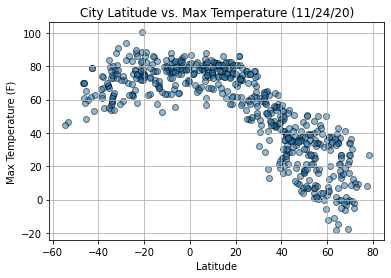

In [16]:
plt.scatter(latitude, max_temp, alpha=.5, edgecolor = 'black')
plt.grid()
plt.title('City Latitude vs. Max Temperature (11/24/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
output_file = "../output_data/Lat_vs_Temp.png"
plt.savefig(output_file)
plt.show()

This code plots the latitudes of all the cities in comparison to their max temperature. It compares how temperature changes as city latitude changes. 

## Latitude vs. Humidity Plot

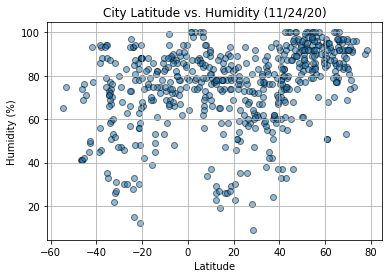

In [17]:
plt.scatter(latitude, humidity, alpha=.5, edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (11/24/20)')
output_file = "../output_data/Lat_vs_Humid.png"
plt.savefig(output_file)
plt.show()

This code plots the latitudes of all the cities in comparison to their humidity value. It compares how humidity changes as city latitude changes. 

## Latitude vs. Cloudiness Plot

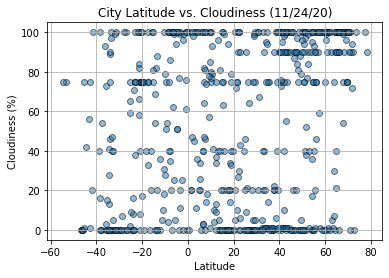

In [18]:
plt.scatter(latitude, cloudiness, alpha=.5, edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (11/24/20)')
output_file = "../output_data/Lat_vs_Cloud.png"
plt.savefig(output_file)
plt.show()

This code plots the latitudes of all the cities in comparison to their 
cloud coverage. It compares how cloudiness changes as city latitude changes. 

## Latitude vs. Wind Speed Plot

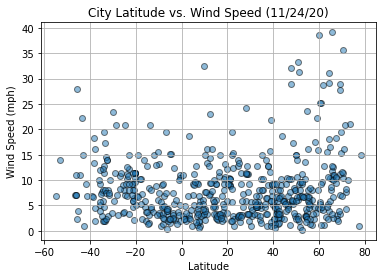

In [19]:
plt.scatter(latitude, wind_speed, alpha=.5, edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (11/24/20)')
output_file = "../output_data/Lat_vs_Wind.png"
plt.savefig(output_file)
plt.show()

This code plots the latitudes of all the cities in comparison to the wind speed in the city. It compares how wind speed changes as city latitude changes. 

## Linear Regression

In [20]:
north_df = weather_df[weather_df['Lat'] >= 0]
south_df = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

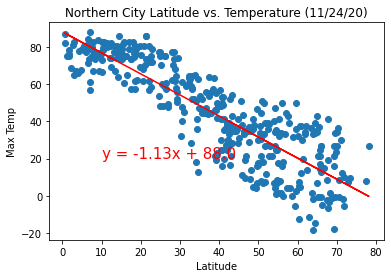

The r-value is: -0.8667983856643688


In [22]:
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Max Temp']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern City Latitude vs. Temperature (11/24/20)')
output_file = "../output_data/NorthLat_vs_Temp.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

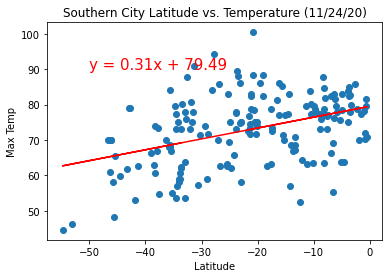

The r-value is: 0.41244070248327974


In [24]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern City Latitude vs. Temperature (11/24/20)')
output_file = "../output_data/SouthLat_vs_Temp.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

For the northern hemisphere, the temperature tends to decrease with an increase in latitude with an r value of -.87. In the southern hemisphere the temperature increases along with the latitude as the r value is .41. In both cases, the temperature tends to be hottest around the equator at 0 degrees latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [2]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern City Latitude vs. Humidity (11/24/20)')
output_file = "../output_data/NorthLat_vs_Humid.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

NameError: name 'north_df' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

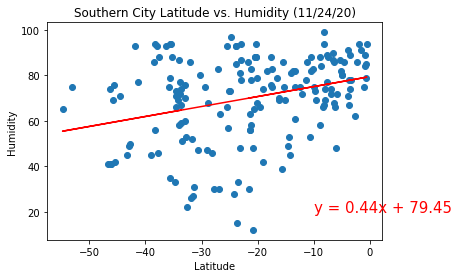

The r-value is: 0.30659956700809154


In [26]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern City Latitude vs. Humidity (11/24/20)')
output_file = "../output_data/SouthLat_vs_Humid.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

Both the northern and the southern hemispheres show a weak correlation between latitude and humidity. The southern hemisphere has an r value of .31 while the northern hemisphere has an r value of .35. This suggests the humidity slightly tends to increase towards the northern latitudes.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

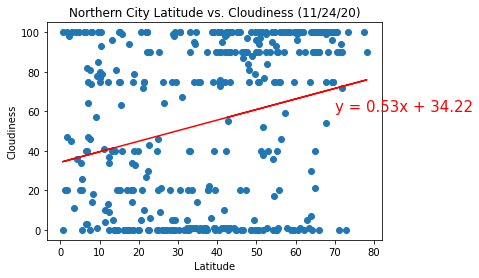

The r-value is: 0.26121552102498846


In [27]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern City Latitude vs. Cloudiness (11/24/20)')
output_file = "../output_data/NorthLat_vs_Cloud.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

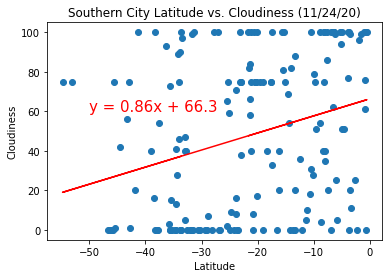

The r-value is: 0.2901843767844603


In [28]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern City Latitude vs. Cloudiness (11/24/20)')
output_file = "../output_data/SouthLat_vs_Cloud.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

Both the northern and the southern hemispheres show a weak correlation between latitude and cloudiness. The southern hemisphere has an r value of only .29 while the northern hemisphere has an r value of .26. There does not seem to be any correlation between cloudiness and the latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

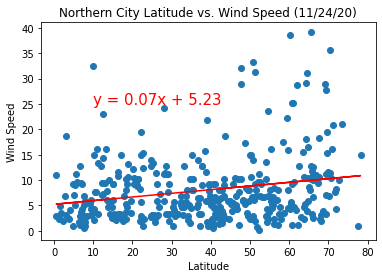

The r-value is: 0.22170674507413168


In [30]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern City Latitude vs. Wind Speed (11/24/20)')
output_file = "../output_data/NorthLat_vs_Wind.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

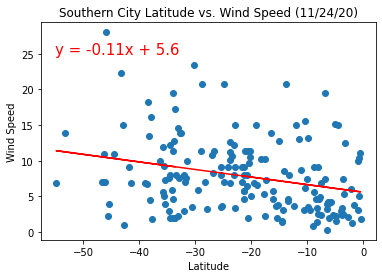

The r-value is: -0.2750269212141572


In [32]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern City Latitude vs. Wind Speed (11/24/20)')
output_file = "../output_data/SouthLat_vs_Wind.png"
plt.savefig(output_file)
plt.show()
print('The r-value is: ' + str(rvalue))

The southern hemisphere has a very small negative correlation between latitude and wind speed with an r value of only -.27. The northern hemisphere has an r value of .22. There does not seem to be any correlation between wind speed and the latitude.